In [7]:
import numpy as np
import matplotlib.pylab as plt

# パーセプトロン

![画像がありません](../image/perceptron.png)

複数の信号を入力として受け取り、一つの信号を出力する。ニューロンでは送られてきた信号の総和が計算され、その総和がある限界値θを超えた場合にのみ1を出力する。

$$
    y = 
    \begin{cases}
        0 (w_1  x_1+w_2  x_2+w_3  x_3≤ θ) \\
        1 (w_1  x_1+w_2  x_2+w_3  x_3  > θ) \\
    \end{cases}
$$

パーセプトロンは、複数ある入力信号のそれぞれに固有の重みをもつ。その重みは各信号の重要性をコントロールする、つまり重みが大きければ大きいほど、その重みに対応する信号の重要性も高くなるということ。

# ニューラルネットワーク
## 活性化関数

![画像がありません](../image/node1.png)

$$
    y = h(b+w_1  x_1+w_2  x_2) \\
    h(x) = 
        \begin{cases}
            0 (x≤0) \\
            1 (x>0) \\
        \end{cases}
$$

ここで登場した、h(x)という関数が**活性化関数**と呼ばれる。

活性化関数の候補としてたくさんある中、パーセプトロンでは”ステップ関数”を採用している。<br>
一方、NNでは活性化関数に”シグモイド関数”も用いて信号の変換を行い、その変換された信号が次のニューロンに伝えられる。

### - ステップ関数
入力が0を超えたら１を出力し、それ以外は０を出力する関数。

In [26]:
def step_function(x):
    if x>0:
        return 1
    else:
        return 0

In [27]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1,1.0)
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### - シグモイド関数
$$
    h(x)=\frac{1}{1+exp⁡(-x)}
$$

In [28]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

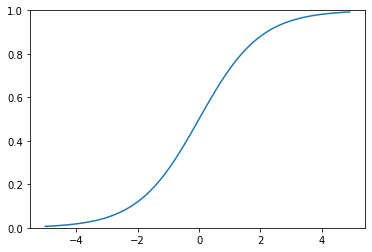

In [31]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.0,1.0)
plt.show()

滑らかな曲線であり、入力に対して連続的に出力が変化する。<br>
一方、ステップ関数は急に出力を変えている。つまり、パーセプトロンではニューロン間を0か1の二つの信号が流れていたのに対して、NNでは連続的な実数値の信号が流れる。

二つの関数は共に<u>非線形関数</u>であるという共通点がある。NNでは、活性化関数に線形関数を用いてはならない。<br>
（層を深くすることの意味がなくなってしまうから。）

### - ReLU関数

最近ではReLU関数が主に用いられる。入力が0を超えていればその入力をそのまま出力し、0以下ならば0を出力する。
$$
    h(x) = 
        \begin{cases}
            x (x>0) \\
            0 (x≤0) \\
        \end{cases}
$$

In [32]:
def relu(x):
    return np.maximum(0, x)

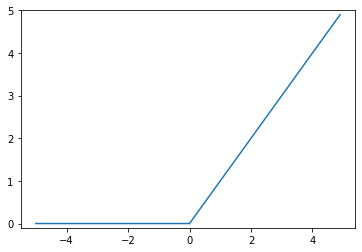

In [36]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1,5.0)
plt.show()

## 多次元配列の計算
A,B共に2次元行列の積の計算

In [38]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [39]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [40]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

![画像がありません](../image/np.dot().png)

numpy配列を使って、NNの実装を行う。（バイアスと活性化関数は省略し、重みだけがあるとする）

In [41]:
X = np.array([1,2])
X.shape

(2,)

In [44]:
W = np.array([[1,3,5],[2,4,6]])
print(W)
W.shape

[[1 3 5]
 [2 4 6]]


(2, 3)

In [46]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


![画像がありません](../image/np.dot()2.png)

### 〜入力層から第1層への信号伝達〜
第1層の「重み付き和」を式で表すと次のようになる。
$$
    A^{(1)}=XW^{(1)}+B^{(1)} \\
$$

In [47]:
x = np.array([1.0,0.5])
w1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
b1 = np.array([0.1,0.2,0.3])

a1 = np.dot(x,w1) + b1

活性化関数によるプロセスをみていく。<br>
隠れ層での重み付き和をaで表し、活性化関数で変換された信号をzで表す。

In [48]:
z1 = sigmoid(a1)
print(a1)
print(z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


第2層から出力層への信号伝達は、最後の活性関数だけがこれまでの隠れ層とは異なる。

In [54]:
def identity_function(x):
    return x

identity_function()という関数を定義して、これを出力層の活性化関数として利用。

# 出力層の設計
機械学習の問題は、**「回帰問題」**と**「分類問題」**に大別できる。<br>
**回帰問題**とは、あるデータから連続的な数値の予測を行う問題で、例えば猫の画像を見せてその画像から猫の身長や体重を予測する問題である。活性化関数には<u>ソフトマックス関数</u>を用いる。
**分類問題**は、データがどのクラスに属するか分類する問題で、例えば猫の画像をみせたときにそれが猫か犬かを分類する問題である。活性化関数には<u>恒等関数</u>を用いる。

### - 恒等関数

入力をそのまま出力する。そのため、出力層で恒等関数を用いる時は入力信号をそのまま出力するだけになる。

### - ソフトマックス関数
(3.1)
$$
    y_k = \frac{exp⁡(a_k)}{\sum_{i=0}^{n}exp(a_i)} \quad
$$ 

ここでは、出力層が全部でn個あるとして、k番目の出力$\mathit{y_k}$を求める計算を表している。
分子は入力信号$\mathit{a_k}$の指数関数、分母は全ての入力信号の指数関数の和から構成される。
つまり、分母からわかるように、**出力の各ニューロンが全ての入力信号から影響を受ける**ことになる。

In [56]:
A = np.array([0.3,2.9,4.0])
exp_A = np.exp(A)
print(exp_A)

[ 1.34985881 18.17414537 54.59815003]


In [58]:
sum_exp_A = np.sum(exp_A)
print(sum_exp_A)

74.1221542101633


In [59]:
Y = exp_A / sum_exp_A
print(Y)

[0.01821127 0.24519181 0.73659691]


以上の実装は、(3.1)を正しく表現できているが、オーバーフローに関する問題がある。<br>
例えば、$e^{10}$は20000を超え、$e^{100}$は0が40個以上も並び、$e^{1000}$の結果は無限大を表す。すると、出力の数値が不安定(nan)になってしまう。<br>
そのため、実装の改善案は(3.2)から導かれる。

(3.2)
$$
    y_k = \frac{exp⁡(a_k)}{\sum_{i=1}^{n}exp(a_i)} \quad 
        = \frac{Cexp⁡(a_k)}{C\sum_{i=1}^{n}exp(a_i)} \quad \\
        = \frac{exp⁡(a_k+logC)}{\sum_{i=1}^{n}exp(a_i+logC)} \quad \\
        = \frac{exp⁡(a_k+C')}{\sum_{i=1}^{n}exp(a_i+C')} \quad
$$ 

ソフトマックスの指数関数の計算を行う際は、何かしらの定数を足しても結果は変わらない。オーバーフローの対策としては、入力信号の中で最大の値を用いることが一般的である。

softmax()関数を使えば、NNの出力は次のようになる。

In [60]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [62]:
A = np.array([0.3,2.9,4.0])
y = softmax(A)
print(y)

[0.01821127 0.24519181 0.73659691]


In [63]:
np.sum(y)

1.0

出力が0から1.0の間の実数になっていて、出力の総和は1になる。<br>
この性質のおかげでソフトマックス関数の出力を**「確率」**として解釈することができる。

# まとめ
- NNでは、活性化関数としてシグモイド関数やReLU関数のような滑らかに変化する関数を利用する
- Numpyの多次元配列をうまく使うことで、NNを効率よく実装することができる
- 出力層で使用する活性化関数は、回帰問題では恒等関数、分類問題ではソフトマックス関数を一般的に利用する